<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-1">Principal Component Analysis (PCA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#What-does-PCA-do?" data-toc-modified-id="What-does-PCA-do?-1.0.1">What does PCA do?</a></span></li></ul></li></ul></li><li><span><a href="#Important-Note" data-toc-modified-id="Important-Note-2">Important Note</a></span></li><li><span><a href="#Splitting-into-Training-set-and-Test-set" data-toc-modified-id="Splitting-into-Training-set-and-Test-set-3">Splitting into Training set and Test set</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4">Feature Scaling</a></span></li><li><span><a href="#Applying-PCA" data-toc-modified-id="Applying-PCA-5">Applying PCA</a></span></li><li><span><a href="#Fitting-Logistic-Regression-to-Training-set." data-toc-modified-id="Fitting-Logistic-Regression-to-Training-set.-6">Fitting Logistic Regression to Training set.</a></span></li><li><span><a href="#Predicting-the-Test-set-results" data-toc-modified-id="Predicting-the-Test-set-results-7">Predicting the Test set results</a></span></li><li><span><a href="#Making-the-Confusion-Matrix" data-toc-modified-id="Making-the-Confusion-Matrix-8">Making the Confusion Matrix</a></span></li><li><span><a href="#Visualizing-the-training-set-results" data-toc-modified-id="Visualizing-the-training-set-results-9">Visualizing the training set results</a></span></li><li><span><a href="#Visualizing-the-test-set" data-toc-modified-id="Visualizing-the-test-set-10">Visualizing the test set</a></span></li></ul></div>

# Principal Component Analysis (PCA)

> It is a kind of `Dimensionality Reduction technique`.

* There are two types of **Dimensionality Component Analysis**:

    1. Feature Selection
    2. Feature Extraction


* Feature Selection
> * Backward Elimination
  * Forward Selection
  * Bidirectional Elimination
  * Score Comparison
  
* Feature Extraction
> * Principal Component Analysis (PCA)
  * Linear Discriminant Analysis (LDA)
  * Kernel PCA
  * Quadratic Discriminant Analysis (QDA)

### What does PCA do?

> From the `m` independent variables of your dataset, PCA will extract $p <= m$ new independent variables that explain the most of the variance of the dataset regardless of the dependent variables.

* The point that the `Dependent Variables `is not considered makes PCA an unsupervised model.

# Important Note

* We are dealing with a classification problem so we will use any of the claffification algorithm alongside PCA to reduce the dimesionality.

* In this case, we are going to use Logistic Regression. 

In [13]:
# Importing the packages and the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
#Import the dataset

dataset = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Udemy Course/Part 9 - Dimensionality Reduction/Principal Component Analysis (PCA)/Wine.csv")

In [15]:
dataset.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


**Logistic Regression** which we are going to build will return the type of wine a customer would prefer for each customer segment.

* Since we have 13 columns, we cannot plot all the IV's in a single plot.

* We need some sort of Dimensionality reduction technique to reduce the 13 dimensions to 2-3 dimensions.

In [16]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting into Training set and Test set

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

* Explained variance is the extracted variance for all the 13 IV's

In [12]:
explained_variance

array([ 0.36884109,  0.19318394,  0.10752862,  0.07421996,  0.06245904,
        0.04909   ,  0.04117287,  0.02495984,  0.02308855,  0.01864124,
        0.01731766,  0.01252785,  0.00696933])

* Since, we need only 2 dimensions in our analysing of data. We will take the top 2 variance which comprise of `36 + 19 = 55 percent` 

* Now we will change the `n_components = 2` and re run all the code.

In [23]:
X_train

array([[ -2.17884511e+00,  -1.07218467e+00],
       [ -1.80819239e+00,   1.57822344e+00],
       [  1.09829474e+00,   2.22124345e+00],
       [ -2.55584748e+00,  -1.66210369e+00],
       [  1.85698063e+00,   2.41573166e-01],
       [  2.58288576e+00,  -1.37668170e+00],
       [  8.72876119e-01,   2.25618512e+00],
       [ -4.18384029e-01,   2.35415681e+00],
       [ -3.04977245e-01,   2.27659433e+00],
       [  2.14082532e+00,  -1.10052871e+00],
       [ -2.98136465e+00,  -2.47159183e-01],
       [  1.96188242e+00,   1.25407738e+00],
       [ -2.16177795e+00,  -9.75966550e-01],
       [  2.21976084e+00,  -2.39507167e+00],
       [ -2.30179529e+00,  -2.05791962e-01],
       [ -3.00953827e+00,  -2.79141212e-01],
       [  2.63443473e+00,  -8.68313119e-01],
       [ -1.09219965e+00,  -3.53906625e+00],
       [  2.62578435e+00,  -2.96852840e-03],
       [  1.98077342e-01,   2.29193443e+00],
       [ -2.67442753e+00,  -2.58800132e+00],
       [ -2.54763698e+00,  -4.52703891e-01],
       [  

In [24]:
np.set_printoptions(formatter={'float_kind':'{:0.3f}'.format})

In [25]:
X_train

array([[-2.179, -1.072],
       [-1.808, 1.578],
       [1.098, 2.221],
       [-2.556, -1.662],
       [1.857, 0.242],
       [2.583, -1.377],
       [0.873, 2.256],
       [-0.418, 2.354],
       [-0.305, 2.277],
       [2.141, -1.101],
       [-2.981, -0.247],
       [1.962, 1.254],
       [-2.162, -0.976],
       [2.220, -2.395],
       [-2.302, -0.206],
       [-3.010, -0.279],
       [2.634, -0.868],
       [-1.092, -3.539],
       [2.626, -0.003],
       [0.198, 2.292],
       [-2.674, -2.588],
       [-2.548, -0.453],
       [1.774, 0.844],
       [-2.778, -0.432],
       [-2.867, -1.876],
       [1.355, 0.040],
       [-2.439, 0.094],
       [-2.273, 0.506],
       [1.179, 2.501],
       [-2.307, 1.305],
       [-2.530, -0.551],
       [0.163, 1.291],
       [2.579, -1.175],
       [-0.762, 3.161],
       [2.570, -0.097],
       [-0.478, 0.578],
       [0.547, -0.378],
       [3.558, -1.458],
       [1.693, 1.378],
       [2.653, -0.239],
       [-3.620, -0.690],
       [-1.61

* Now we can see our dataset has 13 Independent Variables but our training set data has been reduced to 2 

# Fitting Logistic Regression to Training set.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

# Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm 

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [33]:
print(accuracy_score(y_test, y_pred))

0.972222222222


* Checking the accuracy manually using the confusion matrix

$accuracy = \frac{14+15+6}{14+15+6+1}$

# Visualizing the training set results

In [34]:
from matplotlib.colors import ListedColormap

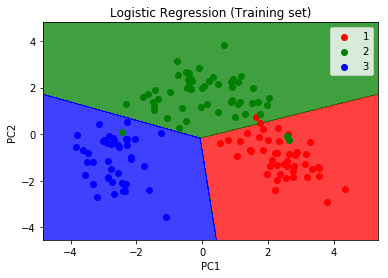

In [38]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualizing the test set

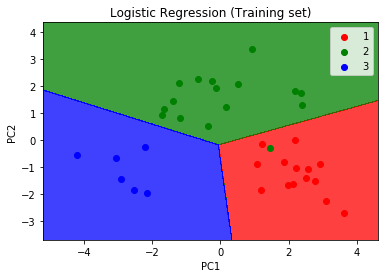

In [37]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()